In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Case Study - Bike sharing Count Prediction**

## **Bike Sharing Dataset**


Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal




## **Background**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



## **Data Set**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.



## **Dataset characteristics**
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv


* instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
*   List item





In [1]:
# season	mnth	hr	holiday	weekday	weathersit	temp	hum	windspeed
# [[4,12,2,1,2,4,32,80,185]]

## **License**
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{ year={2013}, issn={2192-6352}, journal={Progress in Artificial Intelligence}, doi={10.1007/s13748-013-0040-3}, title={Event labeling combining ensemble detectors and background knowledge}, url={http://dx.doi.org/10.1007/s13748-013-0040-3}, publisher={Springer Berlin Heidelberg}, keywords={Event labeling; Event detection; Ensemble learning; Background knowledge}, author={Fanaee-T, Hadi and Gama, Joao}, pages={1-15} }

## **Contact**
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

# **Notebook Contains:-**

1.Import all the neceassary modules and load the data

2.Exploratory Data Analysis

3.Feature Selection

4.Feature Scaling

5.Test - Train Split

6.Modelling & Evaluation

## Import all the neceassary modules and load the data

In [48]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

In [3]:
#reading csv file for day
data_day = pd.read_csv("day.csv")
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
#reading csv file for hour
data_hour = pd.read_csv("hour.csv")
data_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## **Exploratory Data Analysis**

In [7]:
data_hour.shape

(17379, 17)

In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
data_hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


## **Feature Selection**

### 1st way of feature selection

In [12]:
# Here we will select the feature(independent variables) 
#form the dataset which help to give good prediction
# so corr(merthod) is one the way to find the correalation between the independent and dependent variable 
# you can select the feature which is highly correlated to your target variable 
# this the one way to find the features by visualising 
data_hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


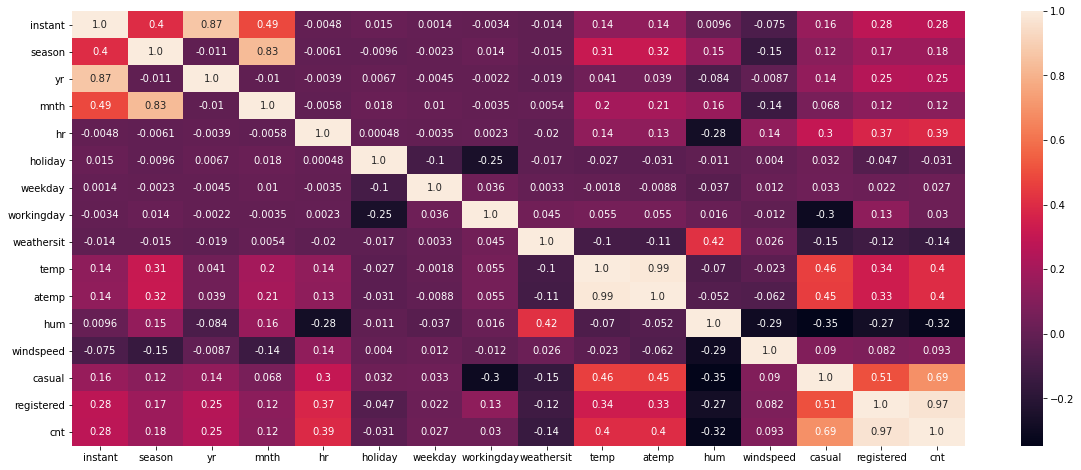

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(data_hour.corr(), annot=True, fmt=".2")



*   Note:- here in above correlation matrix we can see that tem and atemp correlation score is silimar so we will ingore one of them (due to multicollinearty issue)

*   Note:- and if You can see that score of weekday and working day is also almost equale and the meaning of the both column is also same so we will ignore that



### 2nd way for feature selection

In [14]:
data_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
X_train = data_hour.drop(labels=['cnt','dteday'], axis=1)[data_hour['instant']<13030]
X_test = data_hour.drop(labels=['cnt','dteday'], axis =1)[data_hour['instant']>13030]

In [16]:
y_train = data_hour["cnt"][data_hour['instant']<13030]
y_test = data_hour["cnt"][data_hour['instant']>13030]


In [17]:
y_train

0         16
1         40
2         32
3         13
4          1
        ... 
13024    258
13025    151
13026    110
13027     43
13028     17
Name: cnt, Length: 13029, dtype: int64

In [18]:
feature_selection = ExtraTreesRegressor()
feature_selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [19]:
print(feature_selection.feature_importances_)

[1.05289875e-03 9.86534891e-05 3.27365062e-03 6.23984202e-04
 3.12312656e-02 3.75983664e-05 7.69066162e-05 6.95418806e-03
 4.78417976e-05 6.05292878e-03 6.80846562e-03 8.52368458e-05
 6.52804454e-05 1.55473451e-01 7.88117650e-01]


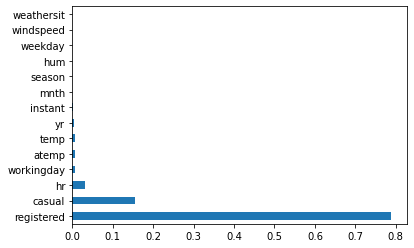

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_selection.feature_importances_,index =X_train.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

### Removing unwanted feature

In [21]:
# removing [atemp,workingday,casual,registered]
data_hour = data_hour.drop(['atemp','workingday','casual','registered','yr','dteday'],axis=1) 

In [22]:
data_hour

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,1,1,0,0,6,1,0.24,0.81,0.0000,16
1,2,1,1,1,0,6,1,0.22,0.80,0.0000,40
2,3,1,1,2,0,6,1,0.22,0.80,0.0000,32
3,4,1,1,3,0,6,1,0.24,0.75,0.0000,13
4,5,1,1,4,0,6,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,2,0.26,0.60,0.1642,119
17375,17376,1,12,20,0,1,2,0.26,0.60,0.1642,89
17376,17377,1,12,21,0,1,1,0.26,0.60,0.1642,90
17377,17378,1,12,22,0,1,1,0.26,0.56,0.1343,61


In [23]:
data_hour["temp"] = data_hour["temp"]*100
data_hour["hum"] = data_hour["hum"]*100
data_hour["windspeed"] = data_hour["windspeed"]*1000

In [24]:
data_hour

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,1,1,0,0,6,1,24.0,81.0,0.0,16
1,2,1,1,1,0,6,1,22.0,80.0,0.0,40
2,3,1,1,2,0,6,1,22.0,80.0,0.0,32
3,4,1,1,3,0,6,1,24.0,75.0,0.0,13
4,5,1,1,4,0,6,1,24.0,75.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,2,26.0,60.0,164.2,119
17375,17376,1,12,20,0,1,2,26.0,60.0,164.2,89
17376,17377,1,12,21,0,1,1,26.0,60.0,164.2,90
17377,17378,1,12,22,0,1,1,26.0,56.0,134.3,61


In [25]:
data_hour.columns

Index(['instant', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Feature scaling

In [26]:
df_clean =data_hour[['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit','temp', 'hum', 'windspeed']]

#assign scaler to column:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [27]:
df_scaled["srno"]= data_hour["instant"]
df_scaled

,season,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,srno
0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.224490,0.81,0.000000,1
1,0.0,0.0,0.043478,0.0,1.000000,0.000000,0.204082,0.80,0.000000,2
2,0.0,0.0,0.086957,0.0,1.000000,0.000000,0.204082,0.80,0.000000,3
3,0.0,0.0,0.130435,0.0,1.000000,0.000000,0.224490,0.75,0.000000,4
4,0.0,0.0,0.173913,0.0,1.000000,0.000000,0.224490,0.75,0.000000,5
...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.826087,0.0,0.166667,0.333333,0.244898,0.60,0.193018,17375
17375,0.0,1.0,0.869565,0.0,0.166667,0.333333,0.244898,0.60,0.193018,17376
17376,0.0,1.0,0.913043,0.0,0.166667,0.000000,0.244898,0.60,0.193018,17377
17377,0.0,1.0,0.956522,0.0,0.166667,0.000000,0.244898,0.56,0.157870,17378


# Train Test Split

In [28]:
data_hour

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,1,1,0,0,6,1,24.0,81.0,0.0,16
1,2,1,1,1,0,6,1,22.0,80.0,0.0,40
2,3,1,1,2,0,6,1,22.0,80.0,0.0,32
3,4,1,1,3,0,6,1,24.0,75.0,0.0,13
4,5,1,1,4,0,6,1,24.0,75.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,2,26.0,60.0,164.2,119
17375,17376,1,12,20,0,1,2,26.0,60.0,164.2,89
17376,17377,1,12,21,0,1,1,26.0,60.0,164.2,90
17377,17378,1,12,22,0,1,1,26.0,56.0,134.3,61


In [29]:
x = data_hour[["season","mnth","hr","holiday","weekday","weathersit","temp","hum","windspeed"]]
x

,season,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed
0,1,1,0,0,6,1,24.0,81.0,0.0
1,1,1,1,0,6,1,22.0,80.0,0.0
2,1,1,2,0,6,1,22.0,80.0,0.0
3,1,1,3,0,6,1,24.0,75.0,0.0
4,1,1,4,0,6,1,24.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,2,26.0,60.0,164.2
17375,1,12,20,0,1,2,26.0,60.0,164.2
17376,1,12,21,0,1,1,26.0,60.0,164.2
17377,1,12,22,0,1,1,26.0,56.0,134.3


In [30]:
[[2,12,18,1,6,2,26,60,134]]

[[2, 12, 18, 1, 6, 2, 26, 60, 134]]

In [31]:
y = data_hour["cnt"]
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [32]:
X_train = data_hour.drop(labels=['cnt'], axis=1)[data_hour['instant']<13030]
X_test = data_hour.drop(labels=['cnt'], axis =1)[data_hour['instant']>13030]

In [33]:
y_train = data_hour["cnt"][data_hour['instant']<13030]
y_test = data_hour["cnt"][data_hour['instant']>13030]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,y, test_size=30, random_state=22)

# **Model**

## **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True, n_jobs=1, normalize=True)
LR.fit(x,y)

LinearRegression(n_jobs=1, normalize=True)

In [36]:
LR.score(x_train,Y_train)

0.33832354619350336

In [37]:
LR.score(x_test,Y_test)

0.33302106712602353

## **Decision Tree regressor**

In [38]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(x,y)

DecisionTreeRegressor(max_depth=20)

In [39]:
DT.score(x_train,Y_train)

0.9857024375307272

In [40]:
DT.score(x_test,Y_test)

0.9847905430294522

In [41]:
pred = DT.predict(x_test)
pred

array([219.        , 192.5       ,  45.        , 182.        ,
         7.        , 744.25      , 150.        , 337.        ,
         6.        , 200.        , 331.        , 500.        ,
        42.        , 315.        ,  44.        ,  37.        ,
       290.        ,  23.        ,  26.        ,  46.        ,
       301.70588235, 219.8       ,  23.        ,  71.        ,
        52.        ,  35.        ,  67.        ,  39.        ,
        99.        ,  97.        ])

In [42]:
analyis = pd.DataFrame({"Orignal":Y_test,"predicted":pred})
analyis

,Orignal,predicted
13012,219,219.000000
15437,217,192.500000
6721,45,45.000000
9160,182,182.000000
6471,7,7.000000
12108,798,744.250000
16026,150,150.000000
6197,337,337.000000
6997,6,6.000000
16178,200,200.000000


C:\Users\Priyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


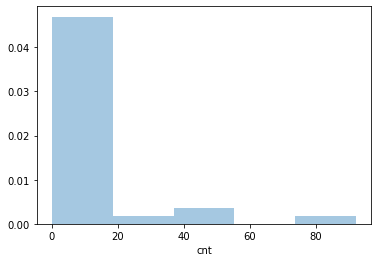

In [43]:
sns.distplot(Y_test - pred)
plt.show()

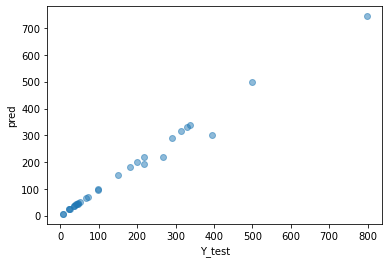

In [46]:
plt.scatter(Y_test, pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("pred")
plt.show()

In [49]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 7.258137254901961
MSE: 474.51188840830457
RMSE: 21.78329379153448


### Pickel File 


In [58]:

import pickle
# open a file, where you ant to store the data
file = open('DT_bike_sharing.pkl', 'wb')

# dump information to that file
pickle.dump(DT, file)

In [59]:

regressor = pickle.load(open('DT_bike_sharing.pkl', 'rb'))

In [60]:
print(regressor)

DecisionTreeRegressor(max_depth=20)


## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=30)
RF.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RF.score(x_train,Y_train)

0.9813248844483331

In [ ]:
RF.score(x_test,Y_test)

0.9606226429284127

In [ ]:
prediction = RF.predict(x_test)
(prediction)

array([209.06      , 198.64      ,  66.73      , 181.21      ,
         6.81      , 730.02627907, 149.56      , 327.21      ,
         6.26      , 186.49      , 314.29      , 435.17      ,
        49.92      , 301.85      ,  47.13      ,  64.8       ,
       263.95      ,  33.63      ,  27.94      , 201.15      ,
       378.52      , 270.26538462,  21.05      ,  76.85      ,
        51.49      ,  48.56      ,  67.78      ,  36.6       ,
       113.11      ,  95.46      ])

In [ ]:

visualise = pd.DataFrame({"Orignal":Y_test,"predicted":prediction})
visualise

,Orignal,predicted
13012,219,209.060000
15437,217,198.640000
6721,45,66.730000
9160,182,181.210000
6471,7,6.810000
12108,798,730.026279
16026,150,149.560000
6197,337,327.210000
6997,6,6.260000
16178,200,186.490000


In [1]:
result = RF.predict([[4,12,2,1,2,4,32,80,185]])
int(result)

NameError: ignored

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test, prediction)

0.9606226429284127

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


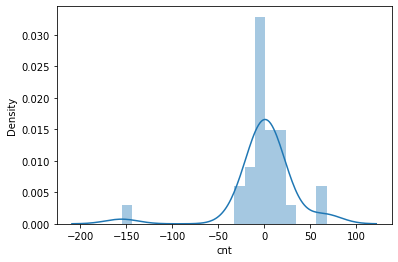

In [ ]:
sns.distplot(Y_test - prediction)
plt.show()

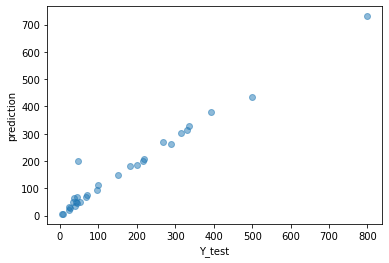

In [ ]:
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("prediction")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 17.6579701848539
MSE: 1228.5135557929173
RMSE: 35.05015771423742


### Pickel File 


In [ ]:
import pickle
# open a file, where you want to store the data
file = open('RF_regression_bike_sharing.pkl', 'wb')

# dump information to that file
pickle.dump(RF, file)


## **Ada Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',n_estimators=100, random_state=22)
ADB.fit(x,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=22)

In [ ]:
ADB.score(x_train,Y_train)

0.5862172216188184

In [ ]:
ADB.score(x_test,Y_test)

0.3130204086763675

### Day Wise count

In [ ]:
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
data = data_day.drop(["instant","dteday","yr","workingday","atemp","casual","registered"],axis=1)

In [ ]:
data["temp"] = (data["temp"]*100)
data["hum"] = (data["hum"]*100) 
data["windspeed"] = data["windspeed"]*1000

In [ ]:
data

,season,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,2,34.4167,80.5833,160.446,985
1,1,1,0,0,2,36.3478,69.6087,248.539,801
2,1,1,0,1,1,19.6364,43.7273,248.309,1349
3,1,1,0,2,1,20.0000,59.0435,160.296,1562
4,1,1,0,3,1,22.6957,43.6957,186.900,1600
...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,2,25.4167,65.2917,350.133,2114
727,1,12,0,5,2,25.3333,59.0000,155.471,3095
728,1,12,0,6,2,25.3333,75.2917,124.383,1341
729,1,12,0,0,1,25.5833,48.3333,350.754,1796


In [ ]:
data.describe()

,season,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,1.395349,49.538479,62.789406,190.486212,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.544894,18.305100,14.242910,77.497871,1937.211452
min,1.000000,1.000000,0.000000,0.000000,1.000000,5.913040,0.000000,22.391700,22.000000
25%,2.000000,4.000000,0.000000,1.000000,1.000000,33.708350,52.000000,134.950000,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,49.833300,62.666700,180.975000,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,2.000000,65.541650,73.020850,233.214500,5956.000000
max,4.000000,12.000000,1.000000,6.000000,3.000000,86.166700,97.250000,507.463000,8714.000000


In [ ]:
data.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [ ]:
a = data[['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'hum','windspeed']]
b = data["cnt"]

In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.25, random_state=22)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=50)
rf.fit(a,b)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.score(a_train,b_train)

0.9447506887119115

In [ ]:
rf.score(a_test,b_test)

0.9463347659235484

In [ ]:
pre = rf.predict(a_test)
(pre)

array([2652.84   , 7192.75   , 3893.09   , 6439.4    , 4860.42   ,
       3944.22   , 1244.42   , 1874.53   , 3054.34   , 5354.51   ,
       5872.35   , 4334.93   , 1261.64   , 6241.16   , 3971.33   ,
       4790.66   , 2111.12   , 2573.79   , 3926.95   , 5908.84   ,
       3881.61   , 5012.03   , 4566.12   , 2209.44   , 7513.78   ,
       3939.61   , 4126.49   , 5379.17   , 3811.59   , 3215.04   ,
       5822.45   , 4235.04   , 4583.46   , 2225.12   , 5046.27   ,
       4078.65   , 7356.48   , 5431.07   , 4067.6    , 4120.87   ,
       2457.12   , 5170.91   , 2929.88   , 4903.52   , 4610.56   ,
       6175.08   , 6465.81   , 6924.36   , 2665.7    , 4840.57   ,
       5975.3    , 6035.43   , 1633.77   , 6256.07   , 5039.37   ,
       2729.84   , 4115.35   , 8348.95   , 4964.71   , 3277.9    ,
       5861.81   , 4829.52   , 6236.4    , 4646.2    , 4646.93   ,
       4295.22   , 2378.59   , 4990.45   , 2843.38   , 2384.76   ,
       4286.09   , 4583.79   , 5490.02   , 2201.36   , 1397.47

In [ ]:
result_2 =pd.DataFrame({"original":b_test,"predicted":pre}) 
result_2

,original,predicted
399,2832,2492.550000
524,7736,7096.750000
77,3117,3919.810000
544,6879,6529.620000
127,4333,4941.150000
...,...,...
138,4575,4853.650000
221,4780,5132.793333
250,1842,2175.280000
721,1749,1981.660000
